In [1]:
import keras
from keras.layers import Activation, Dense, Dropout, Conv2D, Flatten, MaxPooling2D
from keras.models import Sequential, load_model
import librosa as lrb
import librosa.display
import numpy as np
import pandas as pd
import random
import glob
import os
import h5py
import matplotlib.pyplot as plt
from glob import glob
import warnings
warnings.filterwarnings('ignore')

Using Theano backend.


In [2]:
data_dir = 'C:\\Users\\ASUS\\Desktop\\UrbanSound8K\\UrbanSound8K\\audio\\fold1'
audio_files = glob(data_dir + '/*.wav')
len(audio_files)

873

In [3]:
data_dir = 'C:\\Users\\ASUS\\Desktop\\UrbanSound8K\\UrbanSound8K\\audio\\fold2'
audio_files = glob(data_dir + '/*.wav')
len(audio_files)

888

In [4]:
data_dir = 'C:\\Users\\ASUS\\Desktop\\UrbanSound8K\\UrbanSound8K\\audio\\fold3'
audio_files = glob(data_dir + '/*.wav')
len(audio_files)

925

In [5]:
data_dir = 'C:\\Users\\ASUS\\Desktop\\UrbanSound8K\\UrbanSound8K\\audio\\fold4'
audio_files = glob(data_dir + '/*.wav')
len(audio_files)

990

In [6]:
data_dir = 'C:\\Users\\ASUS\\Desktop\\UrbanSound8K\\UrbanSound8K\\audio\\fold5'
audio_files = glob(data_dir + '/*.wav')
len(audio_files)

936

In [7]:
data_dir = 'C:\\Users\\ASUS\\Desktop\\UrbanSound8K\\UrbanSound8K\\audio\\fold6'
audio_files = glob(data_dir + '/*.wav')
len(audio_files)

823

In [8]:
data_dir = 'C:\\Users\\ASUS\\Desktop\\UrbanSound8K\\UrbanSound8K\\audio\\fold7'
audio_files = glob(data_dir + '/*.wav')
len(audio_files)

838

In [9]:
data_dir = 'C:\\Users\\ASUS\\Desktop\\UrbanSound8K\\UrbanSound8K\\audio\\fold8'
audio_files = glob(data_dir + '/*.wav')
len(audio_files)

806

In [10]:
data_dir = 'C:\\Users\\ASUS\\Desktop\\UrbanSound8K\\UrbanSound8K\\audio\\fold9'
audio_files = glob(data_dir + '/*.wav')
len(audio_files)

816

In [11]:
data_dir = 'C:\\Users\\ASUS\\Desktop\\UrbanSound8K\\UrbanSound8K\\audio\\fold10'
audio_files = glob(data_dir + '/*.wav')
len(audio_files)

837

In [12]:
audio, sfreq = lrb.load(audio_files[7])
time = np.arange(0, len(audio)) / sfreq

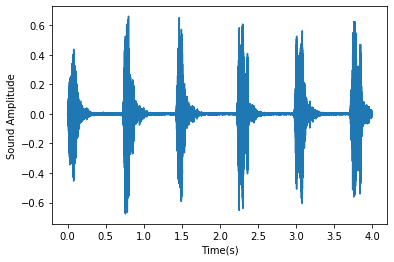

In [13]:
fig, ax = plt.subplots()
ax.plot(time,audio)
ax.set(xlabel='Time(s)',ylabel='Sound Amplitude')
plt.show()

In [14]:
audio, sfreq = lrb.load(audio_files[500])
time = np.arange(0, len(audio)) / sfreq

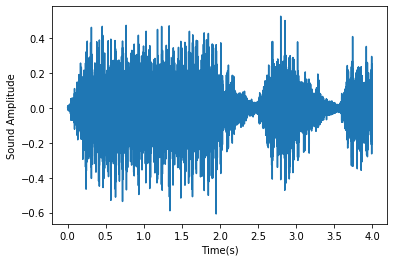

In [15]:
fig, ax = plt.subplots()
ax.plot(time,audio)
ax.set(xlabel='Time(s)',ylabel='Sound Amplitude')
plt.show()

In [16]:
# Read Data
data = pd.read_csv('UrbanSound8K.csv')
data.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [ ]:
data.shape

In [17]:
# Get data over 3 seconds long
valid_data = data[['slice_file_name', 'fold' ,'classID', 'class']][ data['end']-data['start'] >= 3 ]
valid_data.shape

(7468, 4)

In [18]:
# Example of a Siren spectrogram
y, sr = librosa.load('C:\\Users\\ASUS\\Desktop\\UrbanSound8K\\UrbanSound8K\\audio\\fold1\\7383-3-1-0.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

(128, 128)

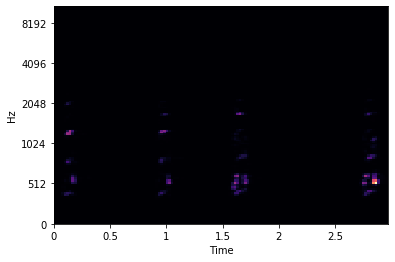

In [19]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [20]:
# Example of a AC spectrogram
y, sr = librosa.load('C:\\Users\\ASUS\\Desktop\\UrbanSound8K\\UrbanSound8K\\audio\\fold1\\15564-2-0-0.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

(128, 128)

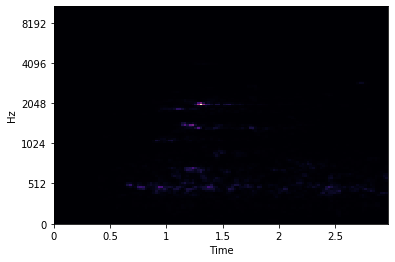

In [21]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [22]:
# Example of a children playing spectrogram
y, sr = librosa.load('C:\\Users\\ASUS\\Desktop\\UrbanSound8K\\UrbanSound8K\\audio\\fold10\\14468-3-5-0.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

(128, 128)

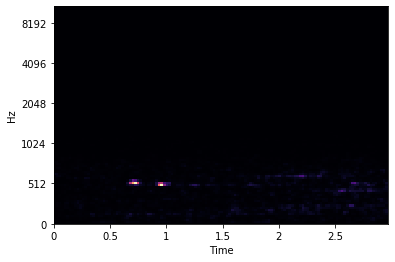

In [23]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [24]:
# Example of a drilling spectrogram
y, sr = librosa.load('C:\\Users\\ASUS\\Desktop\\UrbanSound8K\\UrbanSound8K\\audio\\fold10\\28808-1-0-2.wav', duration=2.97)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
ps.shape

(128, 128)

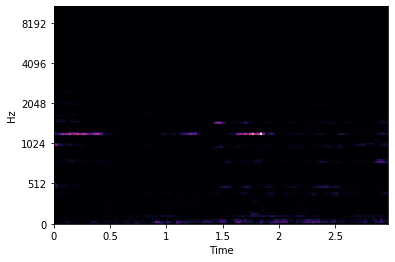

In [25]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [1]:
# Iterating over all samples in valid. For every sample, construct the (128,128) spectrogram

In [26]:
valid_data['path'] = 'fold' + valid_data['fold'].astype('str') + '/' + valid_data['slice_file_name'].astype('str')

In [27]:
D = [] # Dataset

for row in valid_data.itertuples():
    y, sr = librosa.load('C:\\Users\\ASUS\\Desktop\\UrbanSound8K\\UrbanSound8K\\audio\\' + row.path, duration=2.97)  
    ps = librosa.feature.melspectrogram(y=y, sr=sr)
    if ps.shape != (128, 128): continue
    D.append( (ps, row.classID) )

In [29]:
print("Number of samples: ", len(D))

Number of samples:  7467


In [28]:
dataset = D
random.shuffle(dataset)

train = dataset[:7000]
test = dataset[7000:]

X_train, y_train = zip(*train)
X_test, y_test = zip(*test)

# Reshape for CNN input
X_train = np.array([x.reshape( (128, 128, 1) ) for x in X_train])
X_test = np.array([x.reshape( (128, 128, 1) ) for x in X_test])

# One-Hot encoding for classes
y_train = np.array(keras.utils.to_categorical(y_train, 10))
y_test = np.array(keras.utils.to_categorical(y_test, 10))

In [30]:
model= Sequential()
input_shape=(128,128,1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

In [31]:
model.compile(
	optimizer="Adam",
	loss="categorical_crossentropy",
	metrics=['accuracy'])

hist=model.fit(
	x=X_train, 
	y=y_train,
    epochs=80,
    batch_size=128,
    validation_data= (X_test, y_test))

score = model.evaluate(
	x=X_test,
	y=y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 7000 samples, validate on 467 samples
Epoch 1/80
7000/7000 [==============================] - 87s 12ms/step - loss: 2.6790 - acc: 0.2103 - val_loss: 2.1063 - val_acc: 0.2976
Epoch 2/80
7000/7000 [==============================] - 88s 13ms/step - loss: 2.0711 - acc: 0.2657 - val_loss: 1.7770 - val_acc: 0.3726
Epoch 3/80
7000/7000 [==============================] - 98s 14ms/step - loss: 1.8916 - acc: 0.3211 - val_loss: 1.6241 - val_acc: 0.4775
Epoch 4/80
7000/7000 [==============================] - 99s 14ms/step - loss: 1.6708 - acc: 0.4059 - val_loss: 1.4094 - val_acc: 0.5439
Epoch 5/80
7000/7000 [==============================] - 113s 16ms/step - loss: 1.5261 - acc: 0.4646 - val_loss: 1.3187 - val_acc: 0.5525
Epoch 6/80
7000/7000 [==============================] - 115s 16ms/step - loss: 1.4068 - acc: 0.5013 - val_loss: 1.2349 - val_acc: 0.5803
Epoch 7/80
7000/7000 [==============================] - 93s 13ms/step - loss: 1.3497 - acc: 0.5267 - val_loss: 1.2581 - val_acc: 0.5824

In [32]:
hist.history

{'val_loss': [2.106258924819162,
  1.7769707780833928,
  1.6241070106146933,
  1.409447812676685,
  1.3187140223811473,
  1.234885361771512,
  1.2580572114000994,
  1.2654803932606535,
  1.0197572285664414,
  1.0228990285759054,
  0.9912000775847751,
  0.9351439035679084,
  0.916064229333171,
  0.877502427238979,
  0.8418010740004463,
  0.8230545760732647,
  0.8020852072846456,
  0.7724770958469562,
  0.7868259448310803,
  0.7682274370683593,
  0.7119578913141369,
  0.6967700686648776,
  0.6914488517497795,
  0.645383153405894,
  0.7012824033261367,
  0.6992100680155213,
  0.7068004287795285,
  0.680752756381188,
  0.7170021997274117,
  0.6511758539099765,
  0.655602878370428,
  0.6505212633206451,
  0.8035992659644345,
  0.6618631155383663,
  0.602008468078597,
  0.5819678672886507,
  0.6409638495976205,
  0.5358204128144896,
  0.6408217546771374,
  0.6148463123870866,
  0.8577821224098288,
  0.6392002957025483,
  0.6223262290627849,
  0.6065206551960245,
  0.5387170313512487,
  0.612

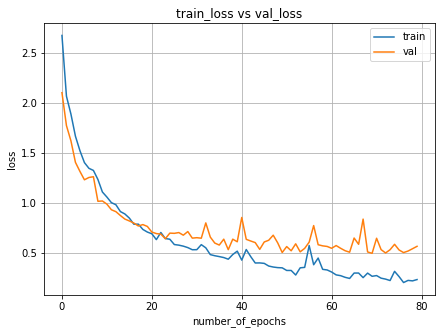

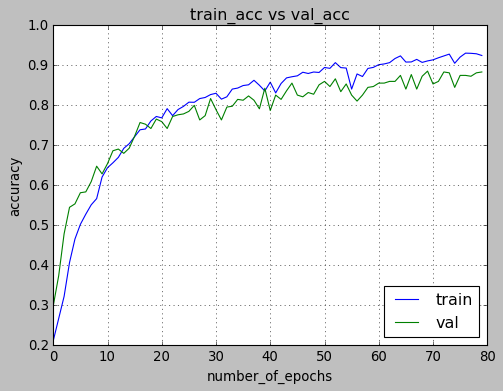

In [33]:
# Plot the results
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']

plt.figure(1,figsize=(7,5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('number_of_epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('number_of_epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
plt.style.use(['classic'])